# Setup

In [1]:
pip install -r ../../requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../../requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Add directory above current directory to path
import sys; sys.path.insert(0, '..')

In [3]:
import pandas as pd
import numpy as np
import os
import gzip
import glob
import json
from tqdm import tqdm
from data_loader.abo import ABO

In [4]:
config = json.load(open("./abo.json"))

# Downloading data

Here we want to preprocess and view the data ourselves, so we set `preprocess=False`

In [5]:
ABO(path=config["data"]["path"],
    download=True,
    extract=True,
    preprocess=False)

abo-listings.tar already exists.
Extracting abo-listings.tar...
abo-images-small.tar already exists.
Extracting abo-images-small.tar...


# Load images

In [5]:
with gzip.open(os.path.join(config["data"]["path"],'images/metadata/images.csv.gz')) as f:
    images_meta = pd.read_csv(f)
images_meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [4]:
images_meta.shape

(398212, 4)

In [5]:
images_meta.isna().sum()

image_id    0
height      0
width       0
path        0
dtype: int64

# Load texts

In the following section, we manually concatenate all the JSON listings in `./datasets/abo/listings`.

However, since this operation takes very long (>30-60mins) and it only needs to be executed once, we include the resulting [`listings.csv` in gzip format](./datasets/abo/listings/listings.csv.gz) in this repository for convenience.

Therefore, you may skip directly to [section "Import listings CSV"](#import-listings-csv).

In [5]:
json_pattern = os.path.join(config["data"]["path"],'listings/metadata/listings_*.json.gz')
print(json_pattern)
file_list = glob.glob(json_pattern)
dfs = []

for f in file_list:
    with gzip.open(f) as f2:
        data = pd.read_json(f2, lines=True)
        print(f, len(data))
        for i, row in tqdm(data.iterrows(), total=data.shape[0]):
            dfs2 = []
            for k in row.keys():
                if (type(row[k]) is list):
                    if (type(row[k][0]) is dict):
                        dfs2.append(pd.json_normalize(row[k][0]).add_prefix(k + "."))
                    else:
                        dfs2.append(pd.DataFrame({k: [row[k]]}))
                else:
                    dfs2.append(pd.DataFrame({k: [row[k]]}))
            dfs.append(dfs2)

./datasets/abo/listings/metadata/listings_*.json
./datasets/abo/listings/metadata/listings_a.json 9232


100%|██████████| 9232/9232 [01:21<00:00, 113.35it/s]


./datasets/abo/listings/metadata/listings_6.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.30it/s]


./datasets/abo/listings/metadata/listings_c.json 9232


100%|██████████| 9232/9232 [01:17<00:00, 118.98it/s]


./datasets/abo/listings/metadata/listings_7.json 9232


100%|██████████| 9232/9232 [01:16<00:00, 120.60it/s]


./datasets/abo/listings/metadata/listings_3.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.65it/s]


./datasets/abo/listings/metadata/listings_d.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.65it/s]


./datasets/abo/listings/metadata/listings_4.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.08it/s]


./datasets/abo/listings/metadata/listings_0.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.10it/s]


./datasets/abo/listings/metadata/listings_2.json 9232


100%|██████████| 9232/9232 [01:24<00:00, 109.47it/s]


./datasets/abo/listings/metadata/listings_e.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.70it/s]


./datasets/abo/listings/metadata/listings_b.json 9232


100%|██████████| 9232/9232 [01:26<00:00, 106.67it/s]


./datasets/abo/listings/metadata/listings_f.json 9222


100%|██████████| 9222/9222 [01:13<00:00, 126.11it/s]


./datasets/abo/listings/metadata/listings_5.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.48it/s]


./datasets/abo/listings/metadata/listings_9.json 9232


100%|██████████| 9232/9232 [01:29<00:00, 103.48it/s]


./datasets/abo/listings/metadata/listings_8.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.15it/s]


./datasets/abo/listings/metadata/listings_1.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.19it/s]


Serializing as pickle may take too long. Recommend exporting to CSV instead, it is much faster.

In [ ]:
# import pickle
# with open("dfs", "wb") as fp:
#     pickle.dump(dfs, fp)

In [ ]:
# dfs = []

# with open("dfs", "rb") as fp:
#     dfs = pickle.load(fp)

The following two cells may also take some time.

In [6]:
dfs_1 = []

for df in tqdm(dfs):
    dfs_1.append(pd.concat(df, axis=1))

100%|██████████| 147702/147702 [02:51<00:00, 861.85it/s] 


In [7]:
dfs_2 = pd.concat(dfs_1)
dfs_2

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,en_IN,Flavia,ml_IN,പുറമെയുള്ള മെറ്റീരിയൽ: PU,ml_IN,ഇളം ചാരനിറം,B07ZFRKDSD,ml_IN,Flavia സ്ത്രീകളുടെ Ballet ഫ്ലാറ്റ്സ് - ചാരനിറം...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,de_DE,Tovess,de_DE,"Ein Premium Dry Gin, der im „Single Batch“-Des...",NaN,NaN,B07WQJ3DZ8,de_DE,"Tovess- Single Batch Crafted Gin (0,04 l)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,365 Everyday Value,en_US,Produced without added hormones.,NaN,NaN,B074H65ZYT,en_US,"365 Everyday Value, Havarti Cheese, Slices, 12 oz",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_US,Red Wagon,en_US,Suede-effect upper,en_US,Grey,B072KWH977,en_US,"Red Wagon Girls' Muck Desert Boots, Grey, 8 us",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfs_2["other_image_id"].notna()

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Name: other_image_id, Length: 147702, dtype: bool

In [9]:
dfs_2.reset_index(drop=True, inplace=True)
dfs_2.to_csv(os.path.join(config["data"]["path"], "listings/listings.csv"))

## Import listings CSV

In [6]:
from ast import literal_eval

In [7]:
# dfs = pd.read_csv(os.path.join(config["data"]["path"], "listings/listings.csv"))

with gzip.open(os.path.join(config["data"]["path"], "listings/listings.csv.gz")) as f:
    dfs = pd.read_csv(f, dtype=object)

In [8]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)
#dfs = dfs.drop(['Unnamed: 0.1'], axis=1)
dfs

,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,model_name.language_tag,...,color,pattern.language_tag,pattern.value,node,finish_type.language_tag,finish_type.value,item_shape.language_tag,item_shape.value,item_name.alternate_representations,brand
0,nl_NL,find.,nl_NL,Schoen in Loafer-stijl,nl_NL,Veelkleurig Vrouw Blauw,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,nl_NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,es_MX,AmazonBasics,es_MX,White Powder Coat Finish,es_MX,White Powder Coat,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,en_AE,AmazonBasics,en_AE,3D printer filament with 1.75mm diameter + / -...,en_AE,Translucent Yellow,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,en_GB,Stone & Beam,NaN,NaN,en_GB,Stone Brown,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,en_AU,The Fix,en_AU,Embroidered flowers bloom against understated ...,en_AU,Havana Tan,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,es_ES,AmazonBasics,es_ES,"20 l de capacidad, plato giratorio de 255 mm; ...",es_ES,Negro,B08158K336,es_ES,"AmazonBasics – Microondas de mesa básico, 20 l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147698,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Mobile, with perfect cut-outs for...",en_IN,multi-colored,B081HNG4QN,en_IN,Amazon Brand - Solimo Designer Abstract 3D Pri...,en_IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147699,en_US,365 Everyday Value,en_US,Brought to you by Whole Foods Market. Our sta...,NaN,NaN,B074JD6D3V,en_US,"365 EVERYDAY VALUE Organic Quinoa, 16 OZ",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147700,es_MX,Stone & Beam,NaN,NaN,NaN,NaN,B07CVCTSF8,es_MX,Stone & Beam - Alfombra Informal a Cuadros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Augmentation with alternative product images

You may skip this section if this augmentation is not needed.

In [70]:
dfs["other_image_id"] = dfs["other_image_id"].fillna("[]")

In [71]:
dfs["other_image_id"] = dfs["other_image_id"].apply(literal_eval)

In [72]:
dfs_3 = dfs.explode(["other_image_id"])

In [73]:
dfs_3["main_image_id"] = dfs_3["other_image_id"]

In [74]:
dfs = pd.concat([dfs, dfs_3])
dfs

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
dfs.reset_index(drop=True, inplace=True)
dfs

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720949,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720950,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720951,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720952,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration

## Columns, size...

In [9]:
dfs.columns

Index(['brand.language_tag', 'brand.value', 'bullet_point.language_tag',
       'bullet_point.value', 'color.language_tag', 'color.value', 'item_id',
       'item_name.language_tag', 'item_name.value', 'model_name.language_tag',
       'model_name.value', 'model_number.value', 'model_year.value',
       'product_type.value', 'style.language_tag', 'style.value',
       'main_image_id', 'other_image_id', 'item_keywords.language_tag',
       'item_keywords.value', 'country', 'marketplace', 'domain_name',
       'node.node_id', 'node.node_name', 'item_dimensions', 'item_weight',
       'material', 'fabric_type', 'color_code', 'product_description',
       'spin_id', '3dmodel_id', 'pattern', 'finish_type', 'item_shape',
       'model_name', 'model_year', 'item_weight.unit', 'item_weight.value',
       'item_weight.normalized_value.unit',
       'item_weight.normalized_value.value', 'material.language_tag',
       'material.value', 'bullet_point', 'style', 'color.standardized_values',
      

In [10]:
dfs.shape

(147702, 63)

## Class distribution

[Text(0, 0, 'CELLULAR_PHONE_CASE'),
 Text(1, 0, 'SHOES'),
 Text(2, 0, 'GROCERY'),
 Text(3, 0, 'HOME'),
 Text(4, 0, 'HOME_BED_AND_BATH'),
 Text(5, 0, 'HOME_FURNITURE_AND_DECOR'),
 Text(6, 0, 'CHAIR'),
 Text(7, 0, 'BOOT'),
 Text(8, 0, 'SANDAL'),
 Text(9, 0, 'FINERING'),
 Text(10, 0, 'HEALTH_PERSONAL_CARE'),
 Text(11, 0, 'FINENECKLACEBRACELETANKLET'),
 Text(12, 0, 'ACCESSORY'),
 Text(13, 0, 'SOFA'),
 Text(14, 0, 'OFFICE_PRODUCTS'),
 Text(15, 0, 'FINEEARRING'),
 Text(16, 0, 'PET_SUPPLIES'),
 Text(17, 0, 'SPORTING_GOODS'),
 Text(18, 0, 'TABLE'),
 Text(19, 0, 'HARDWARE_HANDLE')]

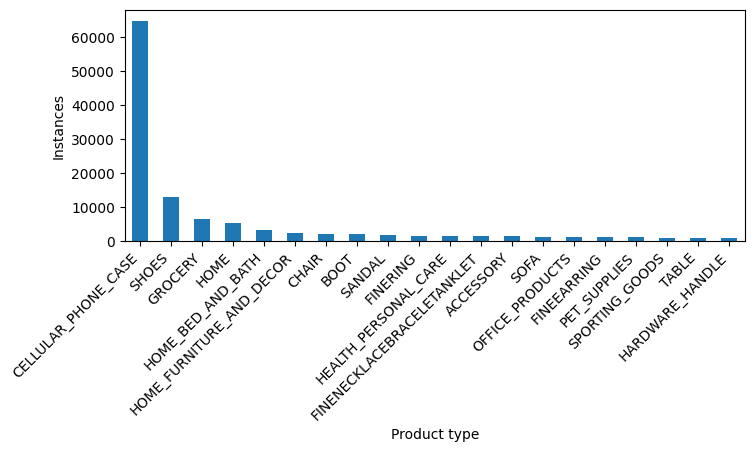

In [11]:
top_n = 20

ax = dfs.groupby(['product_type.value']).size().sort_values(ascending=False).head(top_n).plot.bar(rot=45, figsize=(8,3), xlabel="Product type", ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

In [12]:
dfs.groupby(['product_type.value']).size().sort_values()

product_type.value
MEMORY_READER               1
VIVARIUM                    1
SCULPTURE                   1
CAR_AUDIO_OR_THEATER        1
SHOVEL_SPADE                1
                        ...  
HOME_BED_AND_BATH        3082
HOME                     5264
GROCERY                  6546
SHOES                   12965
CELLULAR_PHONE_CASE     64853
Length: 576, dtype: int64

# Ground truth

In [13]:
listings_new = dfs[["item_keywords.value", "brand.value", "item_id", "item_name.language_tag", "item_name.value", "product_type.value", "product_description.value", "main_image_id"]]

## Merge images and texts

In [14]:
ground_truth = listings_new.merge(images_meta, left_on='main_image_id', right_on='image_id')

## Copy columns for experiments on extended MNN-EM

In [15]:
ground_truth["item_keywords.value2"] = ground_truth["item_keywords.value"]
ground_truth["item_id2"] = ground_truth["item_id"]
ground_truth["item_name.value2"] = ground_truth["item_name.value"]

## Target labels for MNN-EM

In [16]:
ground_truth["label"] = 1

In [17]:
ground_truth.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,block heel shoes,find.,B06X9STHNG,nl_NL,Amazon-merk - vinden. Dames Leder Gesloten Tee...,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,block heel shoes,B06X9STHNG,Amazon-merk - vinden. Dames Leder Gesloten Tee...,1
1,block heel shoes,find.,B06X9GMSD5,en_CA,find. Amazon Brand Women’s Leather Closed-Toe ...,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,block heel shoes,B06X9GMSD5,find. Amazon Brand Women’s Leather Closed-Toe ...,1
2,NaN,find.,B06X9WQGQP,en_GB,find. Women’s Ari Heeled Closed-Toe Heels,SHOES,NaN,81iZlv3bjpL,81iZlv3bjpL,2560,1969,8c/8ccb5859.jpg,NaN,B06X9WQGQP,find. Women’s Ari Heeled Closed-Toe Heels,1
3,22,AmazonBasics,B07P8ML82R,es_MX,"22"" Bottom Mount Drawer Slides, White Powder C...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,22,B07P8ML82R,"22"" Bottom Mount Drawer Slides, White Powder C...",1
4,NaN,AmazonBasics,B01MS9NPOE,tr_TR,"AmazonBasics – Avrupa çekmece rayları, alt tar...",HARDWARE,NaN,619y9YG9cnL,619y9YG9cnL,1200,1200,9f/9f76d27b.jpg,NaN,B01MS9NPOE,"AmazonBasics – Avrupa çekmece rayları, alt tar...",1
5,3d printer filament,AmazonBasics,B07H9GMYXS,en_AE,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",MECHANICAL_COMPONENTS,NaN,81NP7qh2L6L,81NP7qh2L6L,2492,2492,66/665cc994.jpg,3d printer filament,B07H9GMYXS,"AmazonBasics PETG 3D Printer Filament, 1.75mm,...",1
6,love,Stone & Beam,B07CTPR73M,en_GB,"Stone & Beam Stone Brown Swatch, 25020039-01",SOFA,NaN,61Rp4qOih9L,61Rp4qOih9L,500,500,b4/b4f9d0cc.jpg,love,B07CTPR73M,"Stone & Beam Stone Brown Swatch, 25020039-01",1
7,zapatos shoe para de ladies mujer womans mocas...,The Fix,B01MTEI8M6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,SHOES,NaN,714CmIfKIYL,714CmIfKIYL,868,1779,2b/2b1c2516.jpg,zapatos shoe para de ladies mujer womans mocas...,B01MTEI8M6,The Fix Amazon Brand Women's French Floral Emb...,1
8,zapatos shoe para de ladies mujer womans mocas...,The Fix,B072C682N6,en_AU,The Fix Amazon Brand Women's French Floral Emb...,SHOES,NaN,714CmIfKIYL,714CmIfKIYL,868,1779,2b/2b1c2516.jpg,zapatos shoe para de ladies mujer womans mocas...,B072C682N6,The Fix Amazon Brand Women's French Floral Emb...,1
9,cellphonecover,Amazon Brand - Solimo,B0853X2F4M,en_IN,Amazon Brand - Solimo Designer Autumn Girl 3D ...,CELLULAR_PHONE_CASE,NaN,81+4dBN1jsL,81+4dBN1jsL,2200,1879,9d/9dfccb37.jpg,cellphonecover,B0853X2F4M,Amazon Brand - Solimo Designer Autumn Girl 3D ...,1


In [18]:
ground_truth[ground_truth["item_id"] == "B07TBV5BY9"]

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
59860,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,71hKkUIj9dL,71hKkUIj9dL,2200,1879,b0/b01a3299.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1


# False samples/Complement

In [19]:
false_samples = ground_truth.apply(np.random.permutation, axis=0)

## Target labels for MNN-EM

In [20]:
false_samples["label"] = 0

In [21]:
false_samples.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,tea,Amazon Brand - Solimo,B07W7W9ZGW,en_CA,Amazon Brand - Solimo Designer Lion Multicolor...,CELLULAR_PHONE_CASE,NaN,71+0f-vND+L,81AfF5XIFUL,2200,1879,1d/1d5c1bbf.jpg,bedding biancheria cotone da lenzuola letto mo...,B00M92JC0G,Amazon Brand - Solimo Designer Super Girl On F...,0
1,NaN,AmazonBasics,B08569GJLN,es_ES,UMI. Essentials Bollerwagen Offroad Transportw...,CELLULAR_PHONE_CASE,NaN,61mBfpz7vKL,71HuiYg6HGL,1000,2216,e8/e84efe10.jpg,mobile cover,B088ZJ9TSP,Amazon Brand - Solimo Designer Crown Wheel 3D ...,0
2,Back Cover,Solimo,B07TCWRTFS,en_IN,Amazon Brand - Solimo Designer Queen UV Printe...,HOME_FURNITURE_AND_DECOR,NaN,71HeN-cb4NL,71ZwbN0aSPL,2560,2324,77/778cf491.jpg,mobile cover,B07TB4W2XM,"365 Everyday Value, Organic Unfiltered Apple C...",0
3,vinagre de sidra de manzana,Amazon Essentials,B07HSJXXZ4,en_IN,AmazonBasics Large Travel Luggage Duffel Bag -...,GROCERY,NaN,71j4VrpZGRL,81G3Qgx+xEL,1153,1879,38/38387a08.jpg,Samsung Galaxy M21 mobile case,B07TBV1B62,Amazon Brand - Solimo Designer Black Girl Magi...,0
4,tray,Amazon Brand - Solimo,B081PLB1LH,en_GB,Amazon Brand - Solimo Designer Moon Pattern Pr...,LIGHT_BULB,NaN,81LBRNr87TL,714hoM2VpxL,2560,1879,0e/0ee46d3a.jpg,Back Cover,B07TCWSC5Y,Sterling Silver Italian 1.75 mm Diamond Cut Bo...,0
5,sandals for mens stylish,Goodthreads,B07TG4V67L,es_MX,AmazonBasics - Bolsas de basura con cordón,CELLULAR_PHONE_CASE,NaN,71CPqGokEqL,71eNVo6K7tL,2560,1989,f0/f090a503.jpg,mobile cover,B00FXW7076,"365 Everyday Value, Treasure Hunt Trail Mix, 1...",0
6,realme c3 360 cover,Amazon Brand - Solimo,B07T144QC1,en_IN,"365 Everyday Value, Two-Bite Chocolate Cupcake...",CELLULAR_PHONE_CASE,NaN,61LKIrsy-9L,81s2cQ4UVML,1444,1000,25/2511274e.jpg,Whole Foods Market,B07NS1ZJ8R,Amazon Brand - Solimo Designer Multicolor Glas...,0
7,"whole foods, whole food, Whole Foods,365 Every...",Amazon Brand - Solimo,B081HMDPYL,es_ES,Amazon Brand - Solimo Hybrid Shockproof Mobile...,PET_SUPPLIES,NaN,61rkRtmbrQL,71d2tTcDATL,1000,1000,c0/c08e5cff.jpg,mobile cover,B07NQY2TX1,Amazon Brand - Solimo Designer White Texture 3...,0
8,cellphonecover,Amazon Brand - Solimo,B07VX5WVT4,en_US,Amazon Brand - Solimo Designer Red Dress Lady ...,CELLULAR_PHONE_CASE,NaN,81yyjVebESL,71e8cjtzIQL,1124,2560,15/15c23cb5.jpg,NaN,B0857M8PQ4,Amazon Brand - Solimo Designer Multicolor Girl...,0
9,usb c to cable micro cables iphone charger typ...,AmazonBasics,B07T253YKJ,nl_NL,Amazon Brand - The Fix Women's Dakoda Silver F...,SHOES,NaN,71UTvKYWzML,71DmSd8W+GL,2200,2560,56/56fac531.jpg,NaN,B07XYM8QPS,Amazon Brand - Solimo Designer Real Hero DAD P...,0


# Combine ground truth and complement

In [22]:
dataset = pd.concat([ground_truth, false_samples])

In [23]:
# random shuffle
dataset_final = dataset.sample(frac=1, axis=0).reset_index(drop=True)

## Drop unneeded columns

In [24]:
dataset_final = dataset_final.drop(["main_image_id", "image_id", "height", "width", "product_description.value"], axis=1)

In [25]:
dataset_final

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,foldable clothes organizer,Amazon Brand - Solimo,B081FGZYB1,en_IN,Amazon Brand - Solimo Fabric Storage Box with ...,HOME,47/47719245.jpg,foldable clothes organizer,B081FGZYB1,Amazon Brand - Solimo Fabric Storage Box with ...,1
1,mobile cover,Amazon Brand - Solimo,B07TD993MR,en_IN,Amazon Brand - Solimo Designer Feather Texture...,CELLULAR_PHONE_CASE,dc/dc3ee5de.jpg,mobile cover,B07TD993MR,Amazon Brand - Solimo Designer Feather Texture...,1
2,Back Cover,Amazon Brand - Solimo,B08569GH73,en_IN,Amazon Brand - Solimo Designer Love Birds Vect...,CELLULAR_PHONE_CASE,95/95f62fc0.jpg,Back Cover,B08569GH73,Amazon Brand - Solimo Designer Love Birds Vect...,1
3,chest of drawers black bedside table bedroom c...,Movian,B01HEZJ3EC,en_GB,"Amazon Brand - Movian Corona Sideboard, 2 Door...",HOME_FURNITURE_AND_DECOR,19/196b7689.jpg,chest of drawers black bedside table bedroom c...,B01HEZJ3EC,"Amazon Brand - Movian Corona Sideboard, 2 Door...",1
4,NaN,Amazon Brand - Solimo,B0735SFWJZ,en_IN,UMI. by Amazon Grands miroirs muraux Ronds ave...,CELLULAR_PHONE_CASE,0a/0a5e7c18.jpg,NaN,B07FRX12CD,Amazon Brand - Solimo Designer Desert Plant 3D...,0
...,...,...,...,...,...,...,...,...,...,...,...
294249,womenswear,Amazon Brand - Solimo,B07TGZWN5S,en_IN,Amazon Brand - Solimo Designer Black Pattern A...,CELLULAR_PHONE_CASE,4f/4f854fcc.jpg,リング 立方晶ジルコニア エンゲージメント バンド ソリティア ハロー 宝石 結婚式 結晶 ...,B07ZFPXT72,Rivet Arizona - Foto de arena con colgador de ...,0
294250,NaN,Amazon Brand - Solimo,B07TG4SB4P,en_US,"CARE OF by PUMA Men’s Mesh Low-Top Trainers, B...",CELLULAR_PHONE_CASE,50/504500af.jpg,Back Cover,B07TGZS6S6,AmazonBasics Bombillas LED no regulables (A19 ...,0
294251,NaN,Amazon Brand - Solimo,B07D7RRFRR,en_IN,"AmazonBasics 15-Feet Ratchet Tie Downs, 500 Lb...",CELLULAR_PHONE_CASE,1e/1e9f2870.jpg,Back Cover,B08541R5RX,Amazon Brand - find. Western Faux Snakeskin An...,0
294252,NaN,Stone & Beam,B07TF1D7TV,en_IN,Eono by Amazon Leather Wallet for Men and Wome...,CELLULAR_PHONE_CASE,55/5517b544.jpg,Back Cover,B0835496HT,Amazon Brand – Rivet Modern Gold Pyramid Trian...,0


## Select only english articles

In [26]:
dataset_final = dataset_final.loc[(dataset_final['item_name.language_tag'] == "en_US") | (dataset_final['item_name.language_tag'] == "en_GB") | (dataset_final['item_name.language_tag'] == "en_IN")]

In [27]:
dataset_final = dataset_final.drop(["brand.value", "item_name.language_tag"], axis=1)

In [28]:
dataset_final = dataset_final.reset_index(drop=True)

In [29]:
dataset_final

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,foldable clothes organizer,B081FGZYB1,Amazon Brand - Solimo Fabric Storage Box with ...,HOME,47/47719245.jpg,foldable clothes organizer,B081FGZYB1,Amazon Brand - Solimo Fabric Storage Box with ...,1
1,mobile cover,B07TD993MR,Amazon Brand - Solimo Designer Feather Texture...,CELLULAR_PHONE_CASE,dc/dc3ee5de.jpg,mobile cover,B07TD993MR,Amazon Brand - Solimo Designer Feather Texture...,1
2,Back Cover,B08569GH73,Amazon Brand - Solimo Designer Love Birds Vect...,CELLULAR_PHONE_CASE,95/95f62fc0.jpg,Back Cover,B08569GH73,Amazon Brand - Solimo Designer Love Birds Vect...,1
3,chest of drawers black bedside table bedroom c...,B01HEZJ3EC,"Amazon Brand - Movian Corona Sideboard, 2 Door...",HOME_FURNITURE_AND_DECOR,19/196b7689.jpg,chest of drawers black bedside table bedroom c...,B01HEZJ3EC,"Amazon Brand - Movian Corona Sideboard, 2 Door...",1
4,NaN,B0735SFWJZ,UMI. by Amazon Grands miroirs muraux Ronds ave...,CELLULAR_PHONE_CASE,0a/0a5e7c18.jpg,NaN,B07FRX12CD,Amazon Brand - Solimo Designer Desert Plant 3D...,0
...,...,...,...,...,...,...,...,...,...
188993,womenswear,B07TGZWN5S,Amazon Brand - Solimo Designer Black Pattern A...,CELLULAR_PHONE_CASE,4f/4f854fcc.jpg,リング 立方晶ジルコニア エンゲージメント バンド ソリティア ハロー 宝石 結婚式 結晶 ...,B07ZFPXT72,Rivet Arizona - Foto de arena con colgador de ...,0
188994,NaN,B07TG4SB4P,"CARE OF by PUMA Men’s Mesh Low-Top Trainers, B...",CELLULAR_PHONE_CASE,50/504500af.jpg,Back Cover,B07TGZS6S6,AmazonBasics Bombillas LED no regulables (A19 ...,0
188995,NaN,B07D7RRFRR,"AmazonBasics 15-Feet Ratchet Tie Downs, 500 Lb...",CELLULAR_PHONE_CASE,1e/1e9f2870.jpg,Back Cover,B08541R5RX,Amazon Brand - find. Western Faux Snakeskin An...,0
188996,NaN,B07TF1D7TV,Eono by Amazon Leather Wallet for Men and Wome...,CELLULAR_PHONE_CASE,55/5517b544.jpg,Back Cover,B0835496HT,Amazon Brand – Rivet Modern Gold Pyramid Trian...,0


## Random deletion of attributes

In [30]:
dataset_final.isnull().sum()

item_keywords.value     20416
item_id                     0
item_name.value             0
product_type.value          0
path                        0
item_keywords.value2    20445
item_id2                    0
item_name.value2            0
label                       0
dtype: int64

In [31]:
dataset_final.loc[dataset_final["item_keywords.value"].sample(frac=.5).index]

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
110003,mobile cover,B07TCWRT23,Amazon Brand - Solimo Designer Wooden Blocks T...,CELLULAR_PHONE_CASE,98/98c2b58e.jpg,mobile cover,B07TCWRT23,Amazon Brand - Solimo Designer Wooden Blocks T...,1
55310,mobile cover,B07R1DMNK4,Amazon Brand - Solimo Designer Stone Heart 3D ...,RUG,50/50d82e93.jpg,NaN,B07PYQRBTC,STARTER Performance Slide Sandalia para Hombre...,0
151221,Back Cover,B08542LQ4V,Amazon Brand - Solimo Designer Peacock Feather...,CELLULAR_PHONE_CASE,31/310488f9.jpg,Back Cover,B08542LQ4V,Amazon Brand - Solimo Designer Peacock Feather...,1
91477,zapatos shoe para de ladies mujer womans,B07TG4WGLL,Amazon Brand - Inkast Denim Co. Men's White/Gr...,GROCERY,50/50806499.jpg,mobile cover,B07GN2GG71,AmazonBasics Premium Double Braided Nylon USB-...,0
69474,NaN,B07R5ZRNK2,"아마존 브랜드 – Stone & Beam Andover 모던 러브시트 소파, 177...",HOME_FURNITURE_AND_DECOR,12/12bbad2b.jpg,NaN,B07TRWRQSL,Amazon Brand - Solimo Designer Lake Mountain U...,0
...,...,...,...,...,...,...,...,...,...
103771,mobile cover,B07TH3LYSY,Amazon Brand - Solimo Designer Sweet and Sexy ...,CELLULAR_PHONE_CASE,fe/fe3b6726.jpg,mobile cover,B07TH3LYSY,Amazon Brand - Solimo Designer Sweet and Sexy ...,1
147141,Amazon,B07WRXZVPK,Amazon Brand - Solimo Designer Multicolor Spar...,SANDAL,6a/6a1f1fa9.jpg,NaN,B07R7WQF2Y,Amazon Brand - Solimo Designer White Gitar On ...,0
20920,NaN,B071K17BCY,Amazon Brand - Solimo Designer Lake Mountain U...,HARDWARE_HANDLE,29/294ee747.jpg,mobile cover,B086L7MKKS,"AmazonCommercial Vasos, juego de 12",0
80048,mobile cover,B07TG4TTWR,Amazon Brand - Solimo Designer Wheat Flower 3D...,CELLULAR_PHONE_CASE,ea/ea68dfaf.jpg,mobile cover,B07TG4TTWR,Amazon Brand - Solimo Designer Wheat Flower 3D...,1


In [32]:
dataset_final["item_keywords.value"] = dataset_final["item_keywords.value"].sample(frac=.5)
dataset_final["item_id"] = dataset_final["item_id"].sample(frac=.5)
dataset_final["item_name.value"] = dataset_final["item_name.value"].sample(frac=.5)

In [33]:
dataset_final["item_keywords.value2"] = dataset_final["item_keywords.value2"].sample(frac=.5)
dataset_final["item_id2"] = dataset_final["item_id2"].sample(frac=.5)
dataset_final["item_name.value2"] = dataset_final["item_name.value2"].sample(frac=.5)

In [34]:
dataset_final.isnull().sum()

item_keywords.value     104731
item_id                  94499
item_name.value          94499
product_type.value           0
path                         0
item_keywords.value2    104691
item_id2                 94499
item_name.value2         94499
label                        0
dtype: int64

In [35]:
# dataset_final = dataset_final.dropna()     # if random deletion isn't used, execute this line instead
dataset_final = dataset_final.fillna("")

## Concatenate attributes into description columns

`description` is used for MNN-EM and MNN-BTL, while `description2` is used for Extended MNN-EM

In [36]:
dataset_final["description"] = dataset_final["item_keywords.value"] + dataset_final["item_id"] + dataset_final["item_name.value"]# + dataset_final["product_type.value"]

In [37]:
dataset_final["description2"] = dataset_final["item_keywords.value2"] + dataset_final["item_id2"] + dataset_final["item_name.value2"]# + dataset_final["product_type.value"]

In [38]:
dataset_final['product_type'] = dataset_final['product_type.value']

In [39]:
dataset_final = dataset_final[["description", "description2", "path", "label", "product_type"]]

In [40]:
dataset_final

,description,description2,path,label,product_type
0,B081FGZYB1,Amazon Brand - Solimo Fabric Storage Box with ...,47/47719245.jpg,1,HOME
1,mobile coverAmazon Brand - Solimo Designer Fea...,,dc/dc3ee5de.jpg,1,CELLULAR_PHONE_CASE
2,Back Cover,B08569GH73Amazon Brand - Solimo Designer Love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
3,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
4,,Amazon Brand - Solimo Designer Desert Plant 3D...,0a/0a5e7c18.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
188993,B07TGZWN5S,Rivet Arizona - Foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
188994,"CARE OF by PUMA Men’s Mesh Low-Top Trainers, B...",Back Cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
188995,B07D7RRFRR,B08541R5RXAmazon Brand - find. Western Faux Sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
188996,B07TF1D7TV,Amazon Brand – Rivet Modern Gold Pyramid Trian...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE


Because the [random deletion](#random-deletion-of-attributes) is performed for each column, it may occur that all attributes may be empty at the same time. Therefore we drop all rows with empty descriptions

In [41]:
np.where(dataset_final['description2'] == '')[0]

array([     1,     12,     14, ..., 188975, 188985, 188989], dtype=int64)

In [42]:
dataset_final = dataset_final.drop(np.where((dataset_final['description'] == '') | (dataset_final['description2'] == ''))[0])
dataset_final

,description,description2,path,label,product_type
0,B081FGZYB1,Amazon Brand - Solimo Fabric Storage Box with ...,47/47719245.jpg,1,HOME
2,Back Cover,B08569GH73Amazon Brand - Solimo Designer Love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
3,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
5,cellphonecover,cellphonecoverB0853X5J4NAmazon Brand - Solimo ...,09/09eb8914.jpg,1,CELLULAR_PHONE_CASE
6,Fitted SheetB0856B4BH4UMI. Essentials 2 Stück ...,10.or D2 CaseB07TCWRPL1,7d/7d973667.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
188993,B07TGZWN5S,Rivet Arizona - Foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
188994,"CARE OF by PUMA Men’s Mesh Low-Top Trainers, B...",Back Cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
188995,B07D7RRFRR,B08541R5RXAmazon Brand - find. Western Faux Sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
188996,B07TF1D7TV,Amazon Brand – Rivet Modern Gold Pyramid Trian...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE


In [43]:
dataset_final.isnull().sum()

description     0
description2    0
path            0
label           0
product_type    0
dtype: int64

## Set descriptions to lowercase

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312)

In [44]:
dataset_final["description"] = dataset_final["description"].str.lower()

In [45]:
dataset_final["description2"] = dataset_final["description2"].str.lower()

In [46]:
dataset_final

,description,description2,path,label,product_type
0,b081fgzyb1,amazon brand - solimo fabric storage box with ...,47/47719245.jpg,1,HOME
2,back cover,b08569gh73amazon brand - solimo designer love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
3,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
5,cellphonecover,cellphonecoverb0853x5j4namazon brand - solimo ...,09/09eb8914.jpg,1,CELLULAR_PHONE_CASE
6,fitted sheetb0856b4bh4umi. essentials 2 stück ...,10.or d2 caseb07tcwrpl1,7d/7d973667.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
188993,b07tgzwn5s,rivet arizona - foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
188994,"care of by puma men’s mesh low-top trainers, b...",back cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
188995,b07d7rrfrr,b08541r5rxamazon brand - find. western faux sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
188996,b07tf1d7tv,amazon brand – rivet modern gold pyramid trian...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE


## Remove non-ASCII characters

In [52]:
dataset_final["description"] = dataset_final['description'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
dataset_final["description2"] = dataset_final['description2'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [53]:
dataset_final.dropna()

,description,description2,path,label,product_type
0,b081fgzyb1,amazon brand - solimo fabric storage box with ...,47/47719245.jpg,1,HOME
1,back cover,b08569gh73amazon brand - solimo designer love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
2,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
3,cellphonecover,cellphonecoverb0853x5j4namazon brand - solimo ...,09/09eb8914.jpg,1,CELLULAR_PHONE_CASE
4,fitted sheetb0856b4bh4umi. essentials 2 stck k...,10.or d2 caseb07tcwrpl1,7d/7d973667.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
140594,b07tgzwn5s,rivet arizona - foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
140595,"care of by puma mens mesh low-top trainers, be...",back cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
140596,b07d7rrfrr,b08541r5rxamazon brand - find. western faux sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
140597,b07tf1d7tv,amazon brand rivet modern gold pyramid triang...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE


In [54]:
dataset_final = dataset_final.reset_index(drop=True)

In [55]:
dataset_final

,description,description2,path,label,product_type
0,b081fgzyb1,amazon brand - solimo fabric storage box with ...,47/47719245.jpg,1,HOME
1,back cover,b08569gh73amazon brand - solimo designer love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
2,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
3,cellphonecover,cellphonecoverb0853x5j4namazon brand - solimo ...,09/09eb8914.jpg,1,CELLULAR_PHONE_CASE
4,fitted sheetb0856b4bh4umi. essentials 2 stck k...,10.or d2 caseb07tcwrpl1,7d/7d973667.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
140594,b07tgzwn5s,rivet arizona - foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
140595,"care of by puma mens mesh low-top trainers, be...",back cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
140596,b07d7rrfrr,b08541r5rxamazon brand - find. western faux sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
140597,b07tf1d7tv,amazon brand rivet modern gold pyramid triang...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE


## Export dataset

In [56]:
dataset_final.to_csv(os.path.join(config["data"]["path"], "data.csv"))

In [57]:
dataset_final = pd.read_csv(os.path.join(config["data"]["path"], "data.csv"))
dataset_final = dataset_final.drop(['Unnamed: 0'], axis=1)
dataset_final

,description,description2,path,label,product_type
0,b081fgzyb1,amazon brand - solimo fabric storage box with ...,47/47719245.jpg,1,HOME
1,back cover,b08569gh73amazon brand - solimo designer love ...,95/95f62fc0.jpg,1,CELLULAR_PHONE_CASE
2,chest of drawers black bedside table bedroom c...,chest of drawers black bedside table bedroom c...,19/196b7689.jpg,1,HOME_FURNITURE_AND_DECOR
3,cellphonecover,cellphonecoverb0853x5j4namazon brand - solimo ...,09/09eb8914.jpg,1,CELLULAR_PHONE_CASE
4,fitted sheetb0856b4bh4umi. essentials 2 stck k...,10.or d2 caseb07tcwrpl1,7d/7d973667.jpg,0,CELLULAR_PHONE_CASE
...,...,...,...,...,...
140594,b07tgzwn5s,rivet arizona - foto de arena con colgador de ...,4f/4f854fcc.jpg,0,CELLULAR_PHONE_CASE
140595,"care of by puma mens mesh low-top trainers, be...",back cover,50/504500af.jpg,0,CELLULAR_PHONE_CASE
140596,b07d7rrfrr,b08541r5rxamazon brand - find. western faux sn...,1e/1e9f2870.jpg,0,CELLULAR_PHONE_CASE
140597,b07tf1d7tv,amazon brand rivet modern gold pyramid triang...,55/5517b544.jpg,0,CELLULAR_PHONE_CASE
